<div style="background-color: #fff1cd; background-image: url('../socnet.svg'); background-position: 1em 1em; background-repeat: no-repeat; background-size: 3em 3em; box-shadow: 0 0 0.25em 0; color: #403c33; font-weight: bold; min-height: 3em; padding: 1em 1em 1em 5em;">Como o nome sugere, você deve usar este notebook como um *caderno de anotações*. Use as células editáveis para tomar notas, principalmente quando os professores estiverem complementando o conteúdo com exposições orais ou exposições na lousa. Crie um *fork* pessoal do repositório, faça *commits* dessas notas e puxe do *upstream* sempre que o repositório for atualizado. Se alguma atualização modificar um notebook existente, essa modificação não envolverá as células editáveis, portanto não causará conflito.</div>

# Redes Sociais: Material do Encontro 3

Bem-vindo! Ao final desta atividade, você deverá ser capaz de:

* usar a biblioteca Seaborn para visualizar relações entre dados;
* usar a biblioteca SciPy para calcular coeficientes de correlação clássicos;
* usar a biblioteca SciPy para realizar testes de não-correlação clássicos.

Esta atividade deve ser realizada em *dupla* ou *trio*, pois o processo de discussão é importante.

In [1]:
# Configura caminho dos módulos.
import sys
sys.path.append('..')

# Importa módulos não-padrão.
from scipy.stats import kendalltau, pearsonr, spearmanr
import pandas as pd
import seaborn as sns

# Importa módulos próprios.
import socnet as sn

Vamos carregar novamente a rede de citações do Encontro 1.

In [2]:
g = sn.load_graph('../Encontro01/entrada.gml')

Vamos também construir um *data frame* com as seguintes colunas:
* *qualities*: qualidade intrínseca;
* *degrees*: quantidade de citações recebidas ou feitas;
* *indegrees*: quantidade de citações recebidas;
* *outdegrees*: quantidade de citações feitas.

In [3]:
data = pd.DataFrame.from_dict({
    'qualities': [g.nodes[n]['quality'] for n in g.nodes],
    'degrees': [g.degree(n) for n in g.nodes],
    'indegrees': [g.in_degree(n) for n in g.nodes],
    'outdegrees': [g.out_degree(n) for n in g.nodes],
})

Agora vamos visualizar as relações entre esses dados.

In [7]:
%matplotlib inline

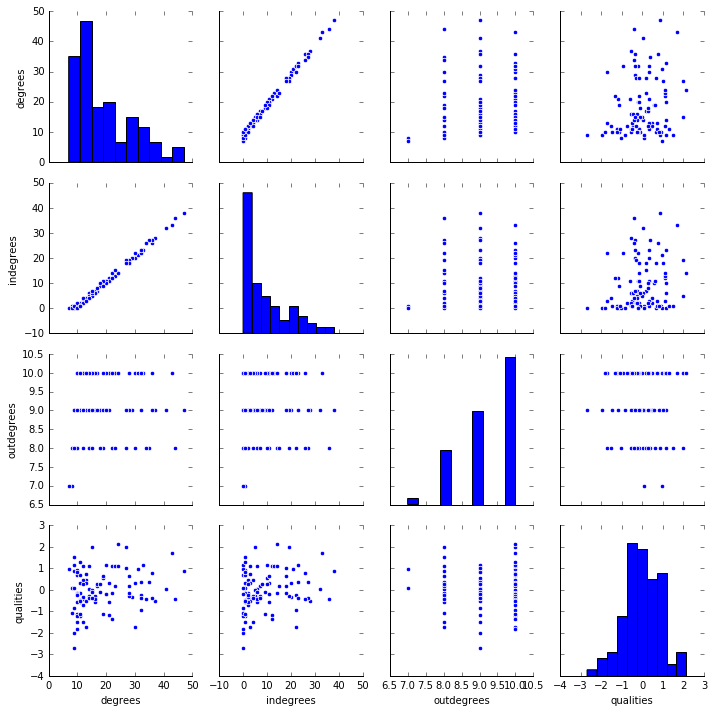

In [8]:
sns.pairplot(data);

**Antes de rodar a próxima célula, estime qual você acha que seria o coeficiente de correlação para cada linha e cada coluna.**

Por fim, vamos calcular diferentes coeficientes de correlação e os *p-values* relativos ao teste da hipótese nula de que não existe correlação.

In [9]:
def test_pearson(x, y):
    return pearsonr(x, y)


def test_spearman(x, y):
    result = spearmanr(x, y)

    return result.correlation, result.pvalue


def test_kendall(x, y):
    result = kendalltau(x, y)

    return result.correlation, result.pvalue


columns = list(data)

for x in columns:
    for y in columns:
        if x != y:
            print('{} x {}'.format(x, y))

            for test in [test_pearson, test_spearman, test_kendall]:
                correlation, pvalue = test(data[x], data[y])

                print('  {}: correlation {}, pvalue {}'.format(test.__name__, correlation, pvalue))

degrees x indegrees
  test_pearson: correlation 0.9963379231362123, pvalue 1.741384266053293e-106
  test_spearman: correlation 0.9835154099091382, pvalue 1.3288137914624736e-74
  test_kendall: correlation 0.9413635701194777, pvalue 8.698457189789048e-44
degrees x outdegrees
  test_pearson: correlation 0.0005322930494152855, pvalue 0.9958063319499435
  test_spearman: correlation 0.06161499129956993, pvalue 0.5425360962877253
  test_kendall: correlation 0.05095829070320784, pvalue 0.4525258628938589
degrees x qualities
  test_pearson: correlation 0.20594030425026116, pvalue 0.039821000162764575
  test_spearman: correlation 0.18339430772585819, pvalue 0.06778861968009063
  test_kendall: correlation 0.12741802589161833, pvalue 0.060332552692507514
indegrees x degrees
  test_pearson: correlation 0.9963379231362123, pvalue 1.741384266053293e-106
  test_spearman: correlation 0.9835154099091382, pvalue 1.3288137914624736e-74
  test_kendall: correlation 0.9413635701194777, pvalue 8.698457189789

**Considerando o artigo da *Vox*, discuta sobre o significado e a significância dos resultados acima.**

Se você colocar o arquivo dos dados de Cabreúva na mesma pasta deste notebook, a linha abaixo deve carregá-lo.

In [10]:
data = pd.read_csv('cabreuva_limpa.csv', encoding='iso-8859-1')

**Tente fazer uma investigação análoga à investigação acima, mas sobre os dados de Cabreúva. Discuta sobre as diferenças dos resultados e sobre como essas diferenças estão relacionadas à natureza dos dados.**

Use as referências abaixo para experimentar outras direções de investigação.

* [Visualizing statistical relationships](https://seaborn.pydata.org/tutorial/relational.html#relational-tutorial);
* [Plotting with categorical data](https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial);
* [Visualizing the distribution of a dataset](https://seaborn.pydata.org/tutorial/distributions.html#distribution-tutorial).

### Observações